<a href="https://colab.research.google.com/github/Aether25-ai/Stock-Price-Prediction-ML/blob/main/Stock_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1473915474.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2024-01-01', end='2026-01-16')
[*********************100%***********************]  1 of 1 completed


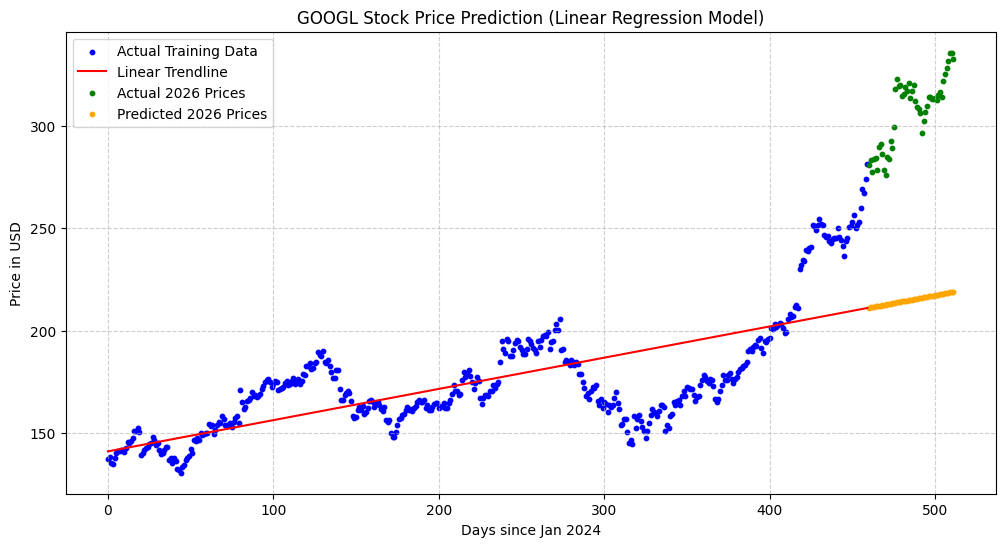

Model Accuracy (R2 Score): -30.18


In [14]:
# ==========================================================
# PROJECT: STOCK MARKET TREND ANALYSIS USING LINEAR REGRESSION
# AUTHOR: Suyash Kumar
# ==========================================================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Fetch Data (2024 to 2026)
ticker = 'GOOGL' # Change this to your preferred stock
df = yf.download(ticker, start='2024-01-01', end='2026-01-16')

# Clean MultiIndex columns if present
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# 2. Prepare Data
# We create a column for 'Days' since Linear Regression needs numerical features
df['Date_No'] = np.arange(len(df))
X = df[['Date_No']] # Independent Variable (Time)
y = df['Close']      # Dependent Variable (Price)

# Split into Training (90%) and Testing (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# 3. Build and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
predictions = model.predict(X_test)

# 5. Visualization
plt.figure(figsize=(12,6))
plt.title(f'{ticker} Stock Price Prediction (Linear Regression Model)')
plt.xlabel('Days since Jan 2024')
plt.ylabel('Price in USD')

plt.scatter(X_train, y_train, color='blue', label='Actual Training Data', s=10)
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Trendline')
plt.scatter(X_test, y_test, color='green', label='Actual 2026 Prices', s=10)
plt.scatter(X_test, predictions, color='orange', label='Predicted 2026 Prices', s=10)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print Accuracy (R-squared)
print(f"Model Accuracy (R2 Score): {model.score(X_test, y_test):.2f}")